In [6]:
import sys

import numpy as np
import torch
from torchvision import models
from torchvision.models import AlexNet_Weights, VGG16_Weights
import matplotlib.pyplot as plt
%matplotlib ipympl

sys.path.append('..')
from stimulus import draw_bar
from mapping import RfMapper
import constants as c

In [7]:
# Please specify some details here:
model = models.alexnet(weights=AlexNet_Weights.IMAGENET1K_V1).to(c.DEVICE)
model_name = 'alexnet'
# model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1).to(c.DEVICE)
# model_name = 'vgg16'
conv_i = 1  # 0 is Conv1, 1 is Conv2, etc.
xn = yn = 227

In [8]:
# Not going to use the mapper object. Just using it to get info about the
# conv layer.
mapper = RfMapper(model, conv_i, (yn, xn))

The RF mapper is for Conv2 (not Conv1) with input shape (yn = 227, xn = 227).


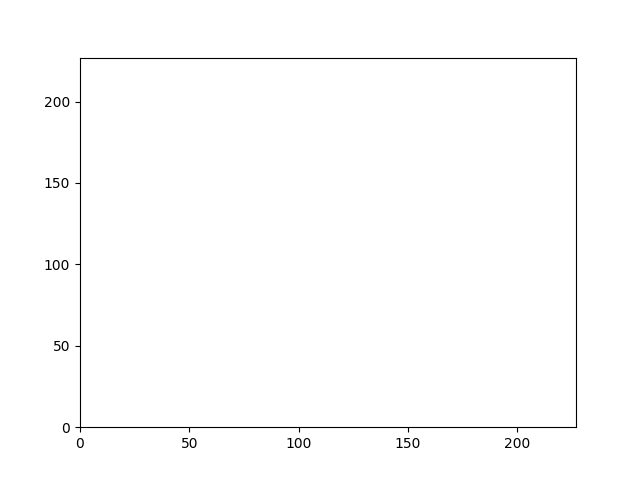

In [18]:
%matplotlib ipympl
class Cursor(object):
    def __init__(self, ax):
        self.ax = ax
        self.xn = 227
        self.yn = 227
        self.theta = 45
        self.blen = 50
        self.bwid = 25
        self.laa = 0.5
        self.fgval = 1
        self.bgval = -1

        # text location in axes coords
        self.txt = ax.text(15, 15, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        bar = draw_bar(self.xn, self.yn, x, y, self.theta,
                       self.blen, self.bwid, self.laa, self.fgval, self.bgval)
        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        self.ax.imshow(bar, cmap='gray')
        
        

fig, ax = plt.subplots()
cursor = Cursor(ax)
plt.connect('motion_notify_event', cursor.mouse_move)

# ax.plot(t, s, 'o')
plt.axis([0, 227, 0, 227])
plt.show()

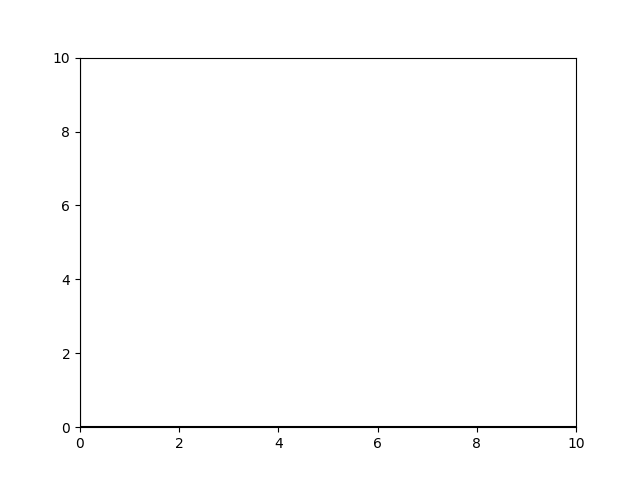

x = 0, y = 0


In [38]:
# from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
%matplotlib ipympl


class Cursor(object):
    def __init__(self, ax):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line
        self.x = 0
        self.y = 0

        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        self.x, self.y = event.xdata, event.ydata
        # update the line positions
        self.lx.set_ydata(self.y)
        self.ly.set_xdata(self.x)
        
        # bar = draw_bar(self.xn, self.yn, x, y, self.theta,
        #                self.blen, self.bwid, self.laa, self.fgval, self.bgval)
        # bar = np.random.rand((100,100))
        # self.ax.imshow(, cmap='gray')

        self.txt.set_text('x=%1.2f, y=%1.2f' % (self.x, self.y))
        plt.draw()
    
    def print_xy(self):
        print(f"x = {self.x}, y = {self.y}")

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*2*np.pi*t)
fig, ax = plt.subplots()

cursor = Cursor(ax)
# cursor = SnaptoCursor(ax, t, s)
plt.connect('motion_notify_event', cursor.mouse_move)

# ax.plot(t, s, 'o')
plt.axis([0, 10, 0, 10])
plt.show()

cursor.print_xy()

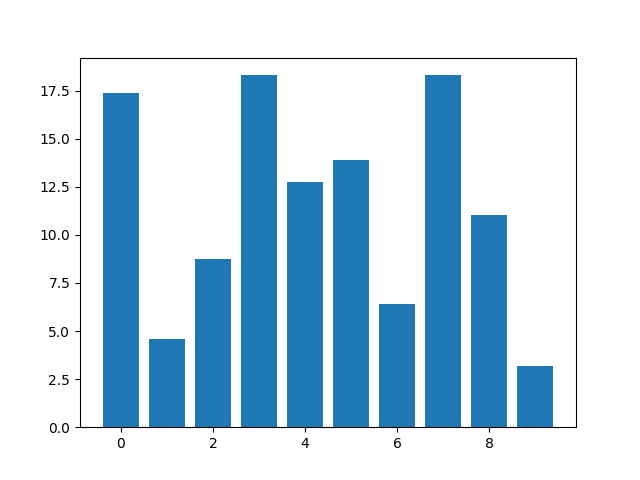

In [39]:
import numpy as np
import matplotlib.pyplot as plt

class DraggableRectangle:
    def __init__(self, rect):
        self.rect = rect
        self.press = None

    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        'on button press we will see if the mouse is over us and store some data'
        if event.inaxes != self.rect.axes: return

        contains, attrd = self.rect.contains(event)
        if not contains: return
        print('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if self.press is None: return
        if event.inaxes != self.rect.axes: return
        x0, y0, xpress, ypress = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        #print('x0=%f, xpress=%f, event.xdata=%f, dx=%f, x0+dx=%f' %
        #      (x0, xpress, event.xdata, dx, x0+dx))
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)

        self.rect.figure.canvas.draw()


    def on_release(self, event):
        'on release we reset the press data'
        self.press = None
        self.rect.figure.canvas.draw()

    def disconnect(self):
        'disconnect all the stored connection ids'
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig = plt.figure()
ax = fig.add_subplot(111)
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()